# Lab 06: Time series analysis 1

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course


## Learning goals:

* Apply and improve your knowledge of Python and Jupyter
* Learn to create and analyze time series
* Experiment with Fourier analysis and the decomposition of time series into frequencies
* Learn to apply Fourier analysis to extract dominant frequencies from time series and interpret them
* Develop a feeling for how statistical tools can help you, but you still require *your interpretation* to draw conclusions.

## Introduction
In this lab, we will experiment with **time series analysis**. A **time series** is simply a dataset of which one variable is time (in any shape or form). **Time** is often the most important independent variable in the Earth Sciences, so time series analysis plays an integral role in our research.

There are many forms of data analysis that can be applied to interpret time series. In this lab, we will experience with **Fourier analysis**, or the analysis of the *frequencies* that make up a time series. *Fourier analysis* is based on the **Fourier theorem**, the mathematical discovery that any periodic time series can be decomposed into a combination of sine and cosine functions. This sounds complicated, and you do not need to know all the ins and outs of how this works. However, it can help you to have a visual understanding of how *Fourier transform* works. The video below from Youtuber *3Blue1Brown* explains the theory in a very nice visual way. You can watch it later if you want to learn some more about *Fourier analysis* so you don't lose time during the computer practical session where you can ask questions about the exercises below.

In [1]:
%%HTML
<div align="center">
    <iframe width="560" height="315"
    src="https://www.youtube.com/embed/spUNpyF58BY">
    allowfullscreen
    </iframe>
</div>

We will work with the `numpy`, `matplotlib.pyplot` and `random` packages, as well as the modules `signal` from the `scipy` package and `interp1d` from the `scipy.interpolate` package. Make sure you have these installed in your python environment if you use Spyder. Let’s start by loading the packages using the code box below. Don't forget to add the line of code needed to make the figures you create appear in `Jupyter`.

In [2]:
# Make sure our figures show up in Jupyter
%matplotlib inline
# Import packages
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import interp1d

## Generating signals
We will start easy by creating our own time series. Create a time axis t running from 0.01 to 100 in intervals of 0.01. We will generate a periodic signal y(t), a sine wave with a period of 5 and an amplitude of 2:

In [3]:
t = np.arange(0.01, 100, 0.01)
y = 2 * np.sin(2 * np.pi * t / 5)

**Exercise 1:** Use your experience with Python from the previous exercises to plot this time series in the code box below:

Text(0, 0.5, 'y')

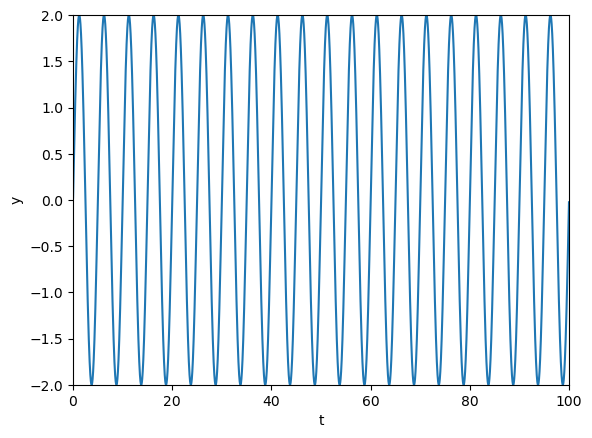

In [4]:
# Plot time series
plt.figure(1) # Create plot
plt.plot(t, y) # Plot variable y against variable t
plt.xlim([0, 100]) # Set x limits
plt.ylim([-2, 2]) # Set y limits
plt.xlabel('t') # Label x axis
plt.ylabel('y') # Label y axis

Now, we will generate a more complex time series that is the superposition of multiple periodic components with different periods. The first signal is a sine wave with period (or wavelength) = 50 (thus frequency = 0.02), and amplitude = 2. The second sine wave has a period = 15 (frequency ~= 0.07), and amplitude = 1. The third sine wave has a period = 5, and amplitude = 0.5.

**Exercise 2:** Define the time axis t from 1 to 1000 in steps of 1, then create and plot the composed sine wave in the box below:

Text(0, 0.5, 'y')

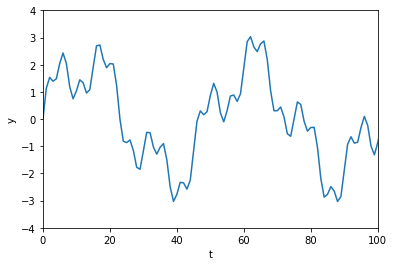

In [4]:
# Create composite time series
t2 = np.arange(0, 1000, 1) # Define time series t2
y2 = 2 * np.sin(2 * np.pi * t2 / 50) + np.sin(2 * np.pi * t2 / 15) + 0.5 * np.sin(2 * np.pi * t2 / 5) # Define the y values y2

# Plot composite time series
plt.figure(2) # Create a new plot
plt.plot(t2, y2) # Plot y2 vs t2
plt.xlim([0, 100]) # Set x-axis limits
plt.ylim([-4, 4]) # Set y-asix limits
plt.xlabel('t') # Label x-axis
plt.ylabel('y') # Label y-axis

Time series in Earth science almost always contain a noise component. We will add some noise to our time series by using the `randn` function, which is part of the package `numpy.random`. We will use the `random.seed` function to set random numbers.

**Exercise 3:** Search the `randn` (in `numpy.random`) and `random.seed` functions in the help:

In [5]:
help(np.random.randn)
help(random.seed)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
 

The `seed` helps to remember the set of random numbers that you will create. Let’s generate a time series of 1000 time steps with random noise:

In [6]:
random.seed(1)
n = np.random.randn(1000)

**Exercise 4:** Now add this random noise to the y-values of the time series we created in **Exercise 2**:

In [7]:
yn = y2 + n # Create yn, which adds the random noise to y2

**Exercise 5:** Now plot the original time series and the time series with random noise added together to compare the result:

Text(0, 0.5, 'y')

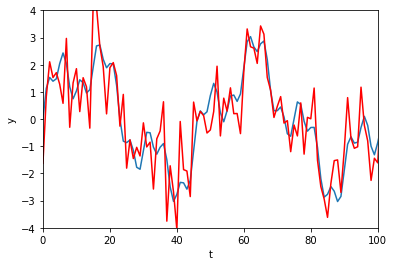

In [8]:
# Plot original and noisy time series together for comparison
plt.figure(3) # Create new plot window
plt.plot(t2, y2) # Plot the original periodic timeseries
plt.plot(t2, yn, color = 'red') # Plot the series with random noise added in another color
plt.xlim([0, 100]) # Set x-axis limits
plt.ylim([-4, 4]) # Set y-asix limits
plt.xlabel('t') # Label x-axis
plt.ylabel('y') # Label y-axis

Time series in Earth science often have a long-term trend (e.g. related to climate change). Let's introduce a linear trend here with a time-dependent linear component:

In [9]:
yt = y2 + 0.005 * t2

**Exercise 6:** Plot the original and time series and the time series with a trend together for comparison.

(-5.0, 5.0)

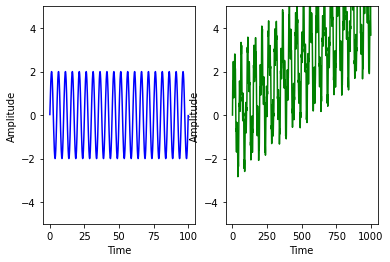

In [10]:
# Plot the original and time series and the time series with a trend together for comparison. 
plt.figure()
plt.subplot(121)
plt.plot(t, y, 'blue') 
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.ylim((-5, 5)) 
plt.subplot(122)
plt.plot(t2, yt,'green')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim((-5, 5))

## Spectral analysis
Examine the `help()` for the `periodogram` function (in the `signal` package) and try to understand every input and output variable from the following line in which the `periodogram` function is applied:

In [12]:
help(signal.periodogram)

Help on function periodogram in module scipy.signal._spectral_py:

periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
    Estimate power spectral density using a periodogram.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length must be nperseg. Defaults
        to 'boxcar'.
    nfft : int, optional
        Length of the FFT used. If `None` the length of `x` will be
        used.
    detrend : str or function 

In [11]:
f0, Pxx0 = signal.periodogram(y2 ,window = np.arange(0, 1000), nfft = 1024, fs = 1)

**Question 1:** What information is contained in the newly created variable `f0`?

**Answer 1:** `f0`contains a list of the frequencies tested on the dataset.

**Question 2:** What information is stored in the new variable `Pxx0`?

**Answer 2:** `Pxx0` contains the spectral power, or amount of variance in the data that is explained by that frequency.

`y2` is the original time series. `0:1000` is a window for the spectral analysis, i.e. a vector with the same length as the time series. `1024` defines the number of points in the Fourier transform, which should be the next power of 2 above the signal length. `1` is the number of samples per unit of time. `Pxx` is the power spectral density (or variance) of the input signal. `f` is the frequency vector, in cycles per unit of time. `f` spans the interval between 0 and the number of samples per unit of time / 2 (here thus 0.5).

Let’s plot the periodogram:

Text(0.5, 1.0, 'Periodogram without noise')

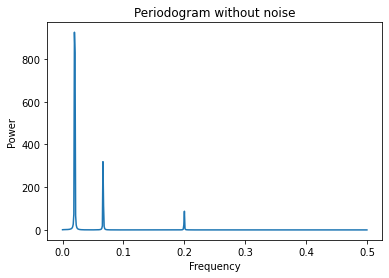

In [12]:
plt.plot(f0, Pxx0)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram without noise')

**Exercise 7:** Now calculate and plot the periodogram for the signal with added noise which you created in **Exercise 4**:

Text(0.5, 1.0, 'Periodogram with noise')

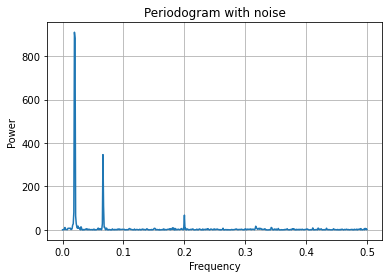

In [13]:
# Calculate and plot the periodogram for the time series with noise.

fn, Pxxn = signal.periodogram(yn, window = np.arange(0, 1000), nfft = 1024, fs = 1)

plt.figure()
plt.plot(fn, Pxxn)
plt.grid()
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.title('Periodogram with noise')

**Exercise 8:** Let’s now create a time series with five times more noise. Again, calculate and plot the periodogram.

Text(0.5, 1.0, 'Periodogram with noise * 5')

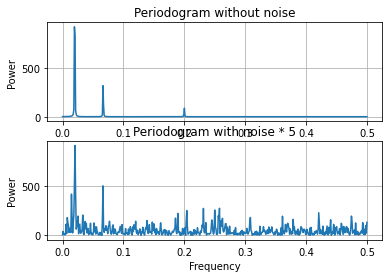

In [14]:
random.seed(1)
n2 = 5 * np.random.randn(1000)
yn2 = y2 + n2

fn2, Pxxn2 = signal.periodogram(yn2, window = np.arange(0,1000), nfft = 1024, fs = 1)

plt.figure()
plt.subplot(211)
plt.plot(f0, Pxx0)
plt.grid()
plt.ylabel('Power')
plt.title('Periodogram without noise')

plt.subplot(212)
plt.plot(fn2, Pxxn2)
plt.grid()
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.title('Periodogram with noise * 5')


**Question 3:** What do you notice? Tip: For comparison, you can also try to plot both spectra in the same plot.

**Answer 3:** We can see that the peaks of the higher frequencies disappear in the noise.

## Detrending
Let’s also have a look at what the effect is of a long-term trend in a periodogram.

**Exercise 9:** Calculate and plot the periodogram of the time series with a trend.

Text(0.5, 1.0, 'Periodogram with trend')

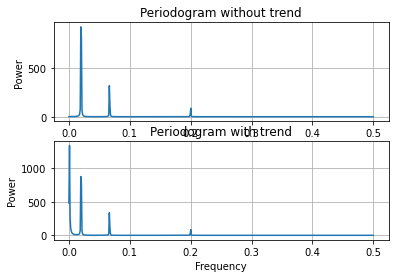

In [19]:
ft, Pxxt = signal.periodogram(yt, window = np.arange(0,1000), nfft = 1024, fs = 1)

plt.figure()
plt.subplot(211)
plt.plot(f0, Pxx0)
plt.grid()
plt.ylabel('Power')
plt.title('Periodogram without trend')

plt.subplot(212)
plt.plot(ft, Pxxt)
plt.grid()
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.title('Periodogram with trend')

**Question 4:** What is the interpretation of the trend in the periodogram? Tip: It may help to plot the periodograms of the original time series and the time series with trend in the same plot.

**Answer 4:** The trend is interpreted by the spectral analysis as a very low (close to 0) frequency signal.

We can use the function `detrend` (`signal`) to get rid of a linear trend in a time series.

**Exercise 10:** Search for `detrend` in the `help()`, and then detrend the time series with trend and have a look at the time series before and after detrending by creating plots of both series.

In [18]:
help(signal.detrend)

Help on function detrend in module scipy.signal._signaltools:

detrend(data, axis=-1, type='linear', bp=0, overwrite_data=False)
    Remove linear trend along axis from data.
    
    Parameters
    ----------
    data : array_like
        The input data.
    axis : int, optional
        The axis along which to detrend the data. By default this is the
        last axis (-1).
    type : {'linear', 'constant'}, optional
        The type of detrending. If ``type == 'linear'`` (default),
        the result of a linear least-squares fit to `data` is subtracted
        from `data`.
        If ``type == 'constant'``, only the mean of `data` is subtracted.
    bp : array_like of ints, optional
        A sequence of break points. If given, an individual linear fit is
        performed for each part of `data` between two break points.
        Break points are specified as indices into `data`. This parameter
        only has an effect when ``type == 'linear'``.
    overwrite_data : bool, optional

Text(0.5, 1.0, 'Detrended trend')

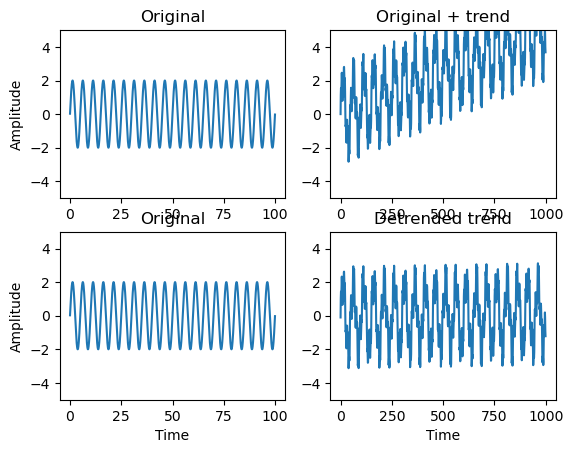

In [19]:
ydt = signal.detrend(yt)

# Plot time series before and after detrending.

plt.figure()
plt.subplot(221)
plt.plot(t, y) 
plt.ylabel('Amplitude')
plt.ylim((-5, 5))
plt.title('Original')
 
plt.subplot(222)
plt.plot(t2, yt)
plt.ylim((-5, 5))
plt.title('Original + trend')

plt.subplot(223)
plt.plot(t, y) 
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.ylim((-5, 5))
plt.title('Original')
 
plt.subplot(224)
plt.plot(t2, ydt)
plt.xlabel('Time')
plt.ylim((-5, 5))
plt.title('Detrended trend')

## Interpolating
Let’s clear the workspace for the following exercise (only if you are using Spyder). 

**Exercise 11:** Load the time series in the `series1.txt` and `series2.txt` files. The first column of the series contains age in kiloyears. The second column contains oxygen-isotope values measured on foraminifera. The datasets contain cyclicities of 100, 40 and 20 kyr. They look quite similar even though the numbers are slightly different. Plot both time series to explore their content.

Text(0.5, 1.0, 'Series 2')

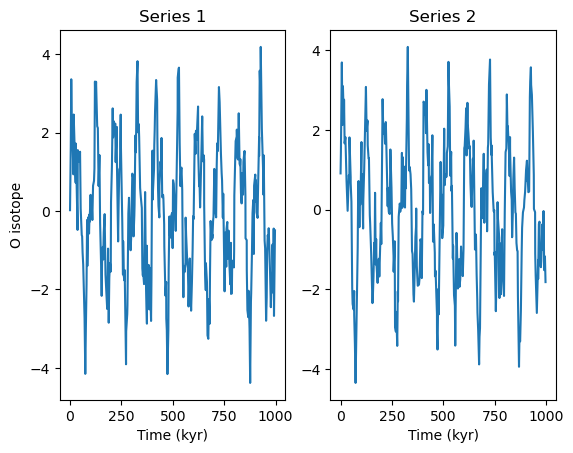

In [20]:
series1 = np.loadtxt('series1.txt')
series2 = np.loadtxt('series2.txt')

plt.figure()
plt.subplot(121)
plt.plot(series1[:,0], series1[:,1]) 
plt.xlabel('Time (kyr)')
plt.ylabel('O isotope')
plt.title('Series 1')

plt.subplot(122)
plt.plot(series2[:,0], series2[:,1]) 
plt.xlabel('Time (kyr)')
plt.title('Series 2')

The intervals of the time vectors are not evenly spaced. Let's use the `diff` function (`numpy`, see `help()`) to calculate the intervals of the time axis for series 1. Let’s also plot these intervals:

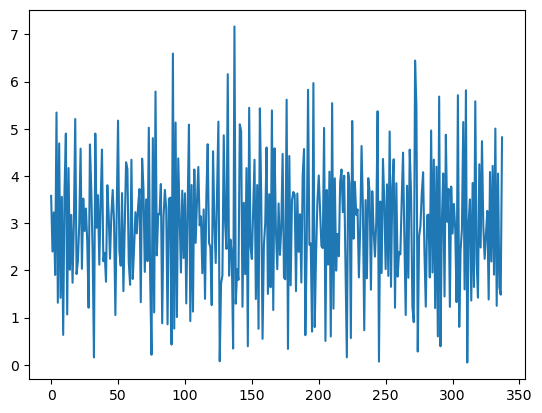

In [21]:
intv1 = np.diff(series1[:,0]) # Calculate the time intervals
plt.plot(intv1) # Plot the intervals vs time

Let’s calculate the minimum and maximum age in time series 1, and the mean interval:

In [22]:
np.min(series1[:,0]) # Minimum interval

0.0

In [23]:
np.max(series1[:,0]) # Maximum interval

997.46537

In [24]:
np.mean(intv1) # Mean interval

2.951080976331361

**Exercise 12:** Do the same for time series 2.

0.0 996.82306 2.9491806508875746


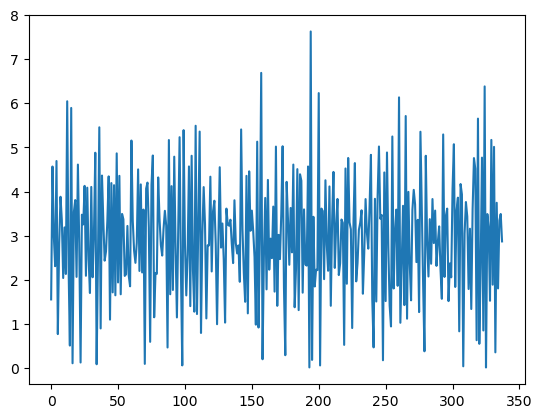

In [25]:
intv2 = np.diff(series2[:,0]) 
plt.plot(intv2)
ts2_min = np.min(series2[:,0]) 
ts2_max = np.max(series2[:,0]) 
ts2_mean = np.mean(intv2)
print(ts2_min, ts2_max, ts2_mean)

**Question 5:** What do you notice when comparing these numbers for both time series?

**Answer 5:** It seems like series 1 and 2 are very similar, although they are not entirely the same. The minimum age is 0 kyrs, the maximum age is around 997 kyrs, and the mean interval for time series is around 3 kyrs. 

It would be nice to have both time series at equal intervals. In addition, it is always easier to work with a time series if the time interval is constant. In fact, many statistical techniques, such as *spectral analysis* will not work on time series which are not **evenly spaced**! We will try to interpolate oxygen isotope values at evenly spaced intervals to do this. We will try to keep approximately the same number of observations as the original time series (~332).

**Exercise 13:** Define an evenly space time vector with a time interval that approximates the mean interval of the original time series (3 kyr), and covers the range of the original data (0-997 kyr).

In [26]:
t3 = np.arange(0, 997, 3)
print(t3)

[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207 210 213
 216 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261 264 267
 270 273 276 279 282 285 288 291 294 297 300 303 306 309 312 315 318 321
 324 327 330 333 336 339 342 345 348 351 354 357 360 363 366 369 372 375
 378 381 384 387 390 393 396 399 402 405 408 411 414 417 420 423 426 429
 432 435 438 441 444 447 450 453 456 459 462 465 468 471 474 477 480 483
 486 489 492 495 498 501 504 507 510 513 516 519 522 525 528 531 534 537
 540 543 546 549 552 555 558 561 564 567 570 573 576 579 582 585 588 591
 594 597 600 603 606 609 612 615 618 621 624 627 630 633 636 639 642 645
 648 651 654 657 660 663 666 669 672 675 678 681 684 687 690 693 696 699
 702 705 708 711 714 717 720 723 726 729 732 735 73

We will use the `interp1` function from `scipy` to calculate the values of the evenly spaced time vector you created above (we call this vector `t3` for now) from the original time series. We will therefore use two different interpolation methods: `linear` and `nearest`. Let’s have a look at the `interp1` function (in the `scipy` package) in the `help()` first:

In [27]:
help(interp1d)

Help on class interp1d in module scipy.interpolate._interpolate:

class interp1d(scipy.interpolate._polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string or as an integer
 |      specifying the order of the spline interpolator to use.
 |      The string has to be one of 'linear', 'nearest', 'nearest-up', 'zero',
 |      'slinear', 'quadra

We will linearly interpolate series 1 as an example of how this function works:

In [28]:
series1L = interp1d(series1[:,0], series1[:,1], kind='linear')(t3)

**Exercise 14:** Now use the function to interpolate series 1 and series 2, each using both the `linear` and the `nearest` method by changing the `kind` parameter.

In [29]:
series1N = interp1d(series1[:,0], series1[:,1], kind='nearest')(t3)
series2L = interp1d(series2[:,0], series2[:,1], kind='linear')(t3)
series2N = interp1d(series2[:,0], series2[:,1], kind='nearest')(t3)

Let's now plot the original data points, and then the interpolated time series. We will also zoom in a bit (using `xlim`) so that we can clearly see the difference between both interpolation techniques:

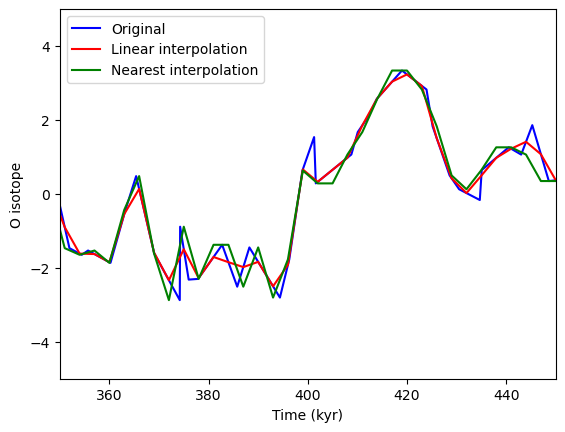

In [30]:
plt.plot(series1[:,0], series1[:,1], color = 'blue')
plt.plot(t3, series1L, color = 'red')
plt.plot(t3, series1N, color = 'green')
plt.ylabel('O isotope')
plt.xlabel('Time (kyr)')
plt.ylim((-5, 5))
plt.xlim((350, 450))
plt.legend(labels = ['Original', 'Linear interpolation', 'Nearest interpolation'])

**Question 6:** Have a good look at the code we used for plotting the interpolations above, and at the plot showing the results. Describe in your own words what the difference is between the two interpolation methods. Which one do you prefer and why?

**Answer 6:** Method `linear` linearly interpolates between points (by drawing straight lines between then) while `nearest` just takes the nearest point in the original time series. `linear` gives a more "smoothed" result while `nearest` retains more of the original variance in the dataset. Both have their advantages and disadvantages.

Now that we have our interpolated time series, we are ready to apply spectral analysis to study the periodicity in the oxygen isotope series.

**Exercise 15:** Calculate a periodogram of series 1 and series 2, and plot them. You can recycle your code from above, but think carefully about how you choose your input to the `signalperiodogram` input (especially the `window` parameter!). You can choose which interpolation method (`linear` or `nearest`) you want to use to make the data evenly spaced. Tip: You can play with the x-axis limits (`plt.xlim`) to zoom in and out in your plot to make it easier to read.

Text(0.5, 1.0, 'Periodogram of series 1 and 2')

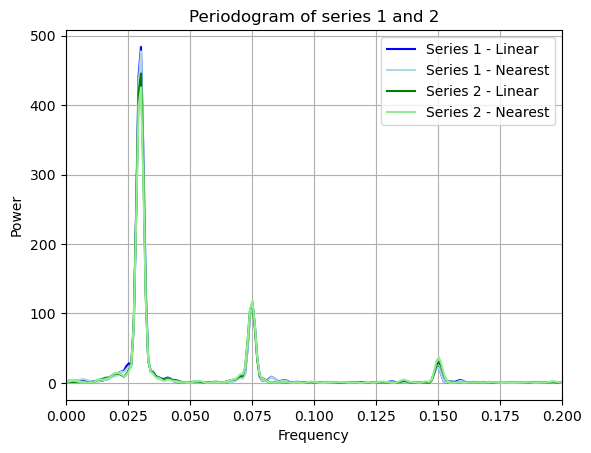

In [31]:
# Calculate and plot the periodograms:
f1L, Pxx1L = signal.periodogram(series1L, window = np.arange(0, len(t3)), nfft = 1024, fs = 1) # Series 1, linear interpolation
f1N, Pxx1N = signal.periodogram(series1N, window = np.arange(0, len(t3)), nfft = 1024, fs = 1) # Series 1, linear interpolation
f2L, Pxx2L = signal.periodogram(series2L, window = np.arange(0, len(t3)), nfft = 1024, fs = 1) # Series 1, linear interpolation
f2N, Pxx2N = signal.periodogram(series2N, window = np.arange(0, len(t3)), nfft = 1024, fs = 1) # Series 1, linear interpolation

plt.figure()
plt.plot(f1L, Pxx1L, color = 'blue')
plt.plot(f1N, Pxx1N, color = 'lightblue')
plt.plot(f2L, Pxx2L, color = 'green')
plt.plot(f2N, Pxx2N, color = 'lightgreen')
plt.grid()
plt.xlim((0, 0.2))
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.legend(labels = ['Series 1 - Linear', 'Series 1 - Nearest', 'Series 2 - Linear', 'Series 2 - Nearest'])
plt.title('Periodogram of series 1 and 2')

**Question 7:** What do you observe in the periodogram plots?

**Answer 7:** Both series show the same strong peaks in their periodogram. The interpolation does not really impact the result.

**Question 8:** Which are the dominant periodicities (in kyr) in the two data series? Explain how you calculated this result. Does the result surprise you? (Tip: Be careful when you calculate the period belonging to a peak in the powerspectrum, because your sampling interval is not equal to 1 kyr!)

**Answer 8:** Peaks in the periodograms occur at frequencies of ~0.027, ~0.075 and ~0.150. This translates to periods of (1 / 0.027 =) ~37, (1 / 0.075 =) ~13 and (1 / 0.150 =) ~6.7 points. However, since these points are 3 kyr apart, the actual periods are (37 * 3 =) 111 kyr, (13 * 3 =) 39 kyr and (6.7 * 3 =) 20 kyr. This should not be surprising, since these are the same periodicities as listed in **Exercise 10**.

**(Non-statistical) BONUS QUESTION:** Oxygen isotope ratios in marine records are a proxy for water temperature. Can you think about a mechanism that may explain the occurrence of the periodic variability you have found in the records?

**ANSWER:** These are the Milankovitch periodicities caused by the precession, tilt and eccentricity of Earth's axis and orbit.